In [1]:
import sys
sys.path.append('../../../modules/')

%reload_ext autoreload
%autoreload 2
import datasets
import ML_classes

import matplotlib.pyplot as plt

2024-03-18 14:27:23.506382: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-18 14:27:23.506424: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-18 14:27:23.506430: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
MOM6_bucket = 'gs://leap-persistent/dhruvbalwada/MOM6/Double_Gyre/res5km/ml_data_'
L = 'all'

In [3]:
ML_data = datasets.MOM6_all_transformer('-', 'all', 
                                       input_channels = ['U_x', 'U_y', 
                                                         'V_x', 'V_y', 
                                                         'Sx', 'Sy', 
                                                         'hx', 'hy',
                                                         'Lfilt'])

In [4]:
ML_data.read_datatree(MOM6_bucket, 
                      file_names='', # need this for file names in DG sim
                      keep_filt_scale=True, 
                      para_perp_out = True, 
                      eta_bottom=True,
                      large_filt=4,
                      H_mask=150,
                      sub_sample=True)

Dataset loaded from gs://leap-persistent/dhruvbalwada/MOM6/Double_Gyre/res5km/ml_data_50km.zarr
Out para perp
Subsampling
Dataset loaded from gs://leap-persistent/dhruvbalwada/MOM6/Double_Gyre/res5km/ml_data_100km.zarr
Out para perp
Subsampling
Dataset loaded from gs://leap-persistent/dhruvbalwada/MOM6/Double_Gyre/res5km/ml_data_200km.zarr
Out para perp
Subsampling
Dataset loaded from gs://leap-persistent/dhruvbalwada/MOM6/Double_Gyre/res5km/ml_data_400km.zarr
Out para perp
Subsampling


In [5]:
ML_data.generate_test_train_batches(normalize=False)

Test and train batches split. Number of batches: 37-5


In [6]:
ANN_model = ML_classes.ANN(num_in = len(ML_data.input_channels))

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [7]:
ML_data.input_channels

['U_x', 'U_y', 'V_x', 'V_y', 'Sx', 'Sy', 'hx', 'hy', 'Lfilt']

In [8]:
regress_sys = ML_classes.RegressionSystem(ANN_model, local_norm=True)

In [9]:
%%time
regress_sys.train_system(ML_data, 51, 1)

Train loss step 0:  0.28870866709464305 test loss: 0.12214880138635635
Train loss step 1:  0.11670364620717796 test loss: 0.10831512361764908
Train loss step 2:  0.10553134897270718 test loss: 0.10011274963617325
Train loss step 3:  0.0991032502135715 test loss: 0.09509520828723908
Train loss step 4:  0.09430314942791655 test loss: 0.0903193935751915
Train loss step 5:  0.08937853051198495 test loss: 0.08573183566331863
Train loss step 6:  0.08573908842093236 test loss: 0.08276890516281128
Train loss step 7:  0.08338996788134447 test loss: 0.08083608895540237
Train loss step 8:  0.08200194706787935 test loss: 0.07969531267881394
Train loss step 9:  0.08109732294404828 test loss: 0.07892230153083801
Train loss step 10:  0.08042957553186932 test loss: 0.078350467979908
Train loss step 11:  0.07986480964196695 test loss: 0.07791307419538498
Train loss step 12:  0.07935281782536893 test loss: 0.07746253460645676
Train loss step 13:  0.07887619190119408 test loss: 0.0769788756966591
Train l

In [10]:
# Save the checkpoint
CKPT_DIR = '/home/jovyan/mesoscale_buoyancy_param_ML/ML_checkpoints/ckpts_all_MOM6_DG_window_1_local_norm_true_out_para_perp_Lfilt_in_Topo_in'
regress_sys.save_checkpoint(CKPT_DIR)

# Save model nc file
model_nc = '/home/jovyan/mesoscale_buoyancy_param_ML/ML_model_ncs/' +'MOM6_DG_all_window_1_local_norm_true_out_para_perp_Lfilt_in_Topo_in'+'.nc'
regress_sys.save_weights_nc(model_nc)

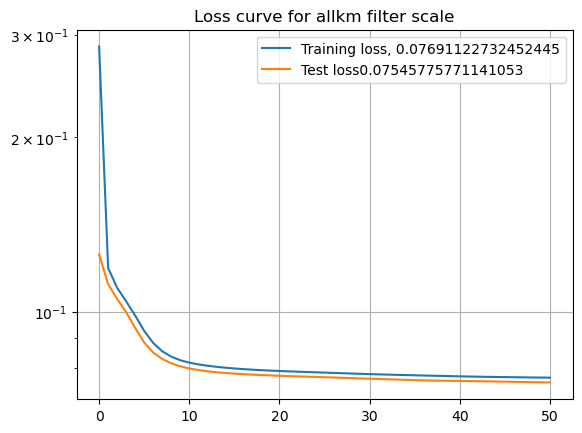

In [14]:
## Loss plot
plt.plot(regress_sys.train_loss, label='Training loss, '+str(regress_sys.train_loss[-1]))
plt.plot(regress_sys.test_loss, label='Test loss'+str(regress_sys.test_loss[-1]))

plt.title('Loss curve for '+ L+ 'km filter scale')
plt.grid()
plt.yscale('log')
plt.legend()

#plt.savefig('figures/MOM6_'+L+'km_loss_curve_36_36.png')

In [14]:
ANN_model_large = ML_classes.ANN(shape=[36,36,2], num_in = len(ML_data.input_channels))

In [18]:
regress_sys_large = ML_classes.RegressionSystem(ANN_model_large, local_norm=True)

In [18]:
%%time
regress_sys_large.train_system(ML_data, 31, 1)

NameError: name 'regress_sys_large' is not defined

In [20]:
# Save the checkpoint
CKPT_DIR = '/home/jovyan/mesoscale_buoyancy_param_ML/ML_checkpoints/ckpts_all_MOM6_P2L_window_1_local_norm_true_out_para_perp_size_36_36'
regress_sys.save_checkpoint(CKPT_DIR)

# Save model nc file
model_nc = '/home/jovyan/mesoscale_buoyancy_param_ML/ML_model_ncs/' +'MOM6_P2L_all_window_1_local_norm_true_out_para_perp_size_36_36'+'.nc'
regress_sys.save_weights_nc(model_nc)